In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

In [99]:
df = pd.read_excel("Creditcardclients.xls")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [100]:
df.shape

(30000, 25)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [102]:
del df["ID"]

In [103]:
df["default payment next month"].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [104]:
for i in df.columns:
    print(i)
    print(df[i].value_counts(normalize=True)*100)
    print("***************")

LIMIT_BAL
50000      11.216667
20000       6.586667
30000       5.366667
80000       5.223333
200000      5.093333
             ...    
800000      0.006667
760000      0.003333
690000      0.003333
1000000     0.003333
327680      0.003333
Name: LIMIT_BAL, Length: 81, dtype: float64
***************
SEX
2    60.373333
1    39.626667
Name: SEX, dtype: float64
***************
EDUCATION
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64
***************
MARRIAGE
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64
***************
AGE
29    5.350000
27    4.923333
28    4.696667
30    4.650000
26    4.186667
31    4.056667
25    3.953333
34    3.873333
32    3.860000
33    3.820000
24    3.756667
35    3.710000
36    3.693333
37    3.470000
39    3.180000
38    3.146667
23    3.103333
40    2.900000
41    2.746667
42    2.646667
44    2.333333
43    2.233333
45    2.05

In [105]:
X = df.drop("default payment next month", axis=1).values
y = df["default payment next month"].values

lista = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
    #print ('Train set:', X_train.shape,  y_train.shape)
    #print ('Test set:', X_test.shape,  y_test.shape)

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)


    lista.append(accuracy_score(y_test,y_pred))

np.array(lista).mean()

0.38003

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1807, 5218],
       [ 249, 1726]], dtype=int64)

In [107]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.8739240506329113

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

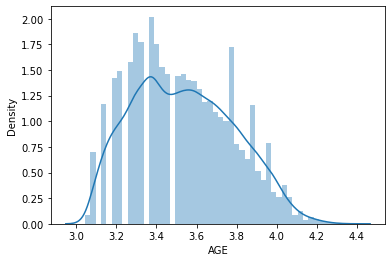

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(np.log(df["AGE"]))


In [109]:
df["AGE"] = np.log(df["AGE"])

In [110]:
df.MARRIAGE = df.MARRIAGE.replace({0:3})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

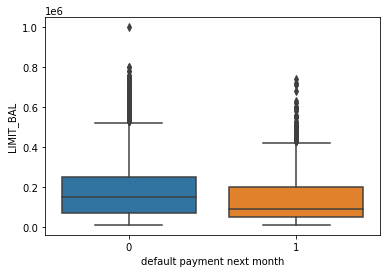

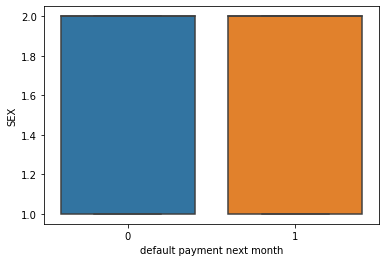

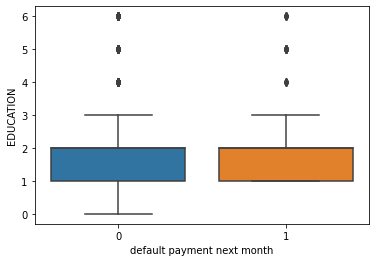

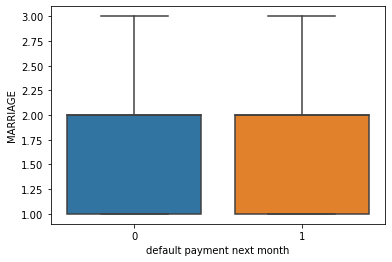

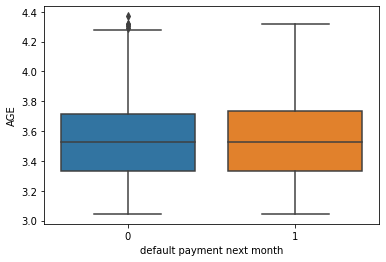

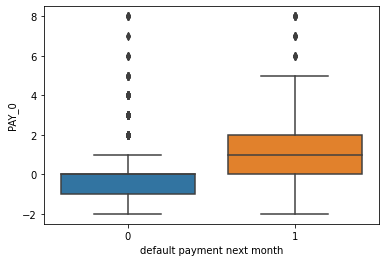

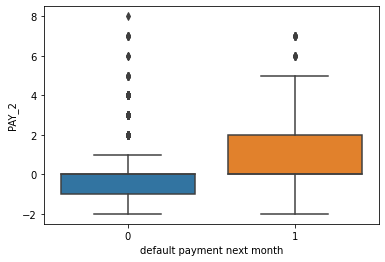

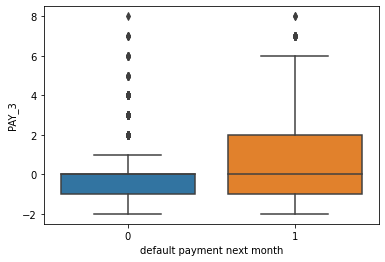

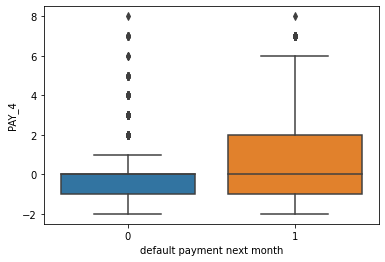

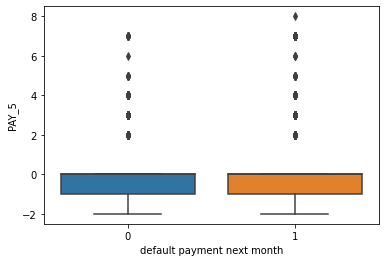

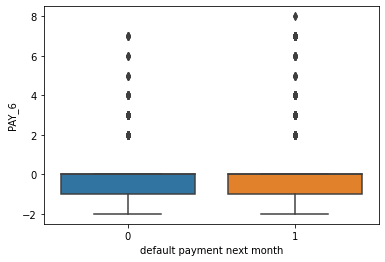

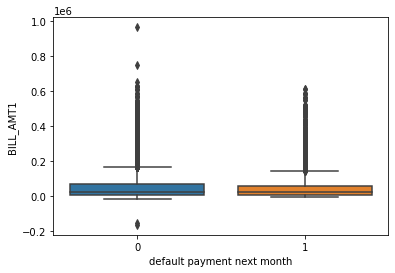

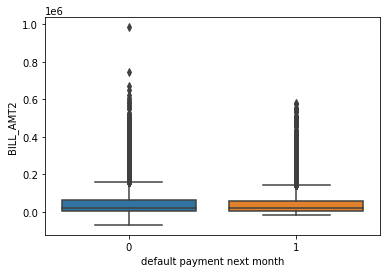

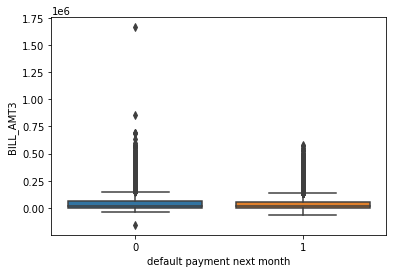

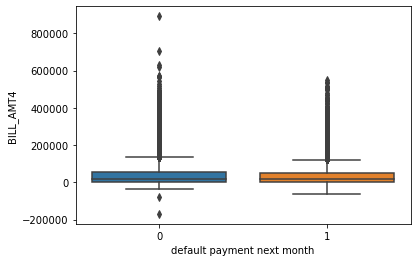

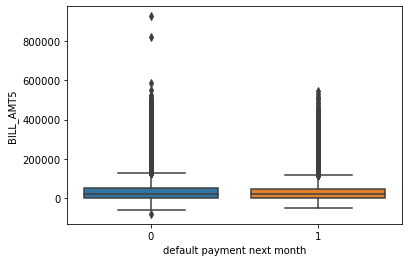

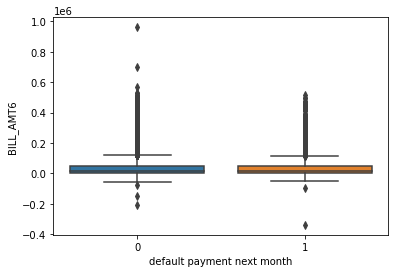

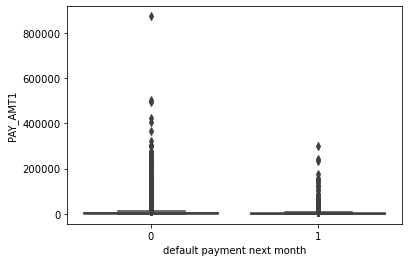

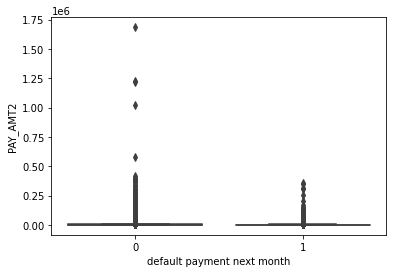

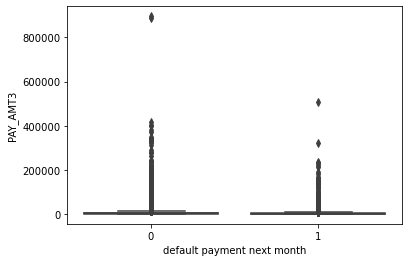

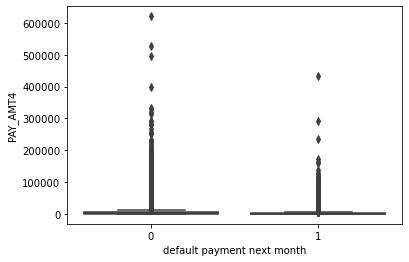

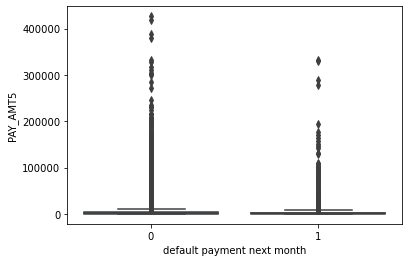

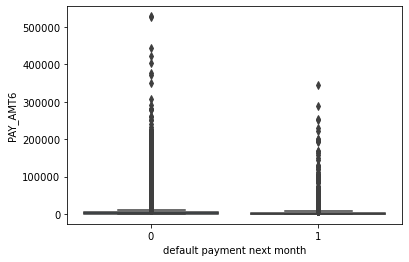

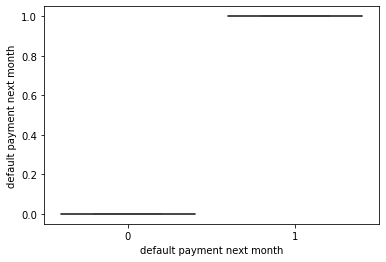

In [111]:
for i in df.columns: 
    plt.subplots()
    sns.boxplot(df["default payment next month"], df[i])
    plt.plot()

<AxesSubplot:>

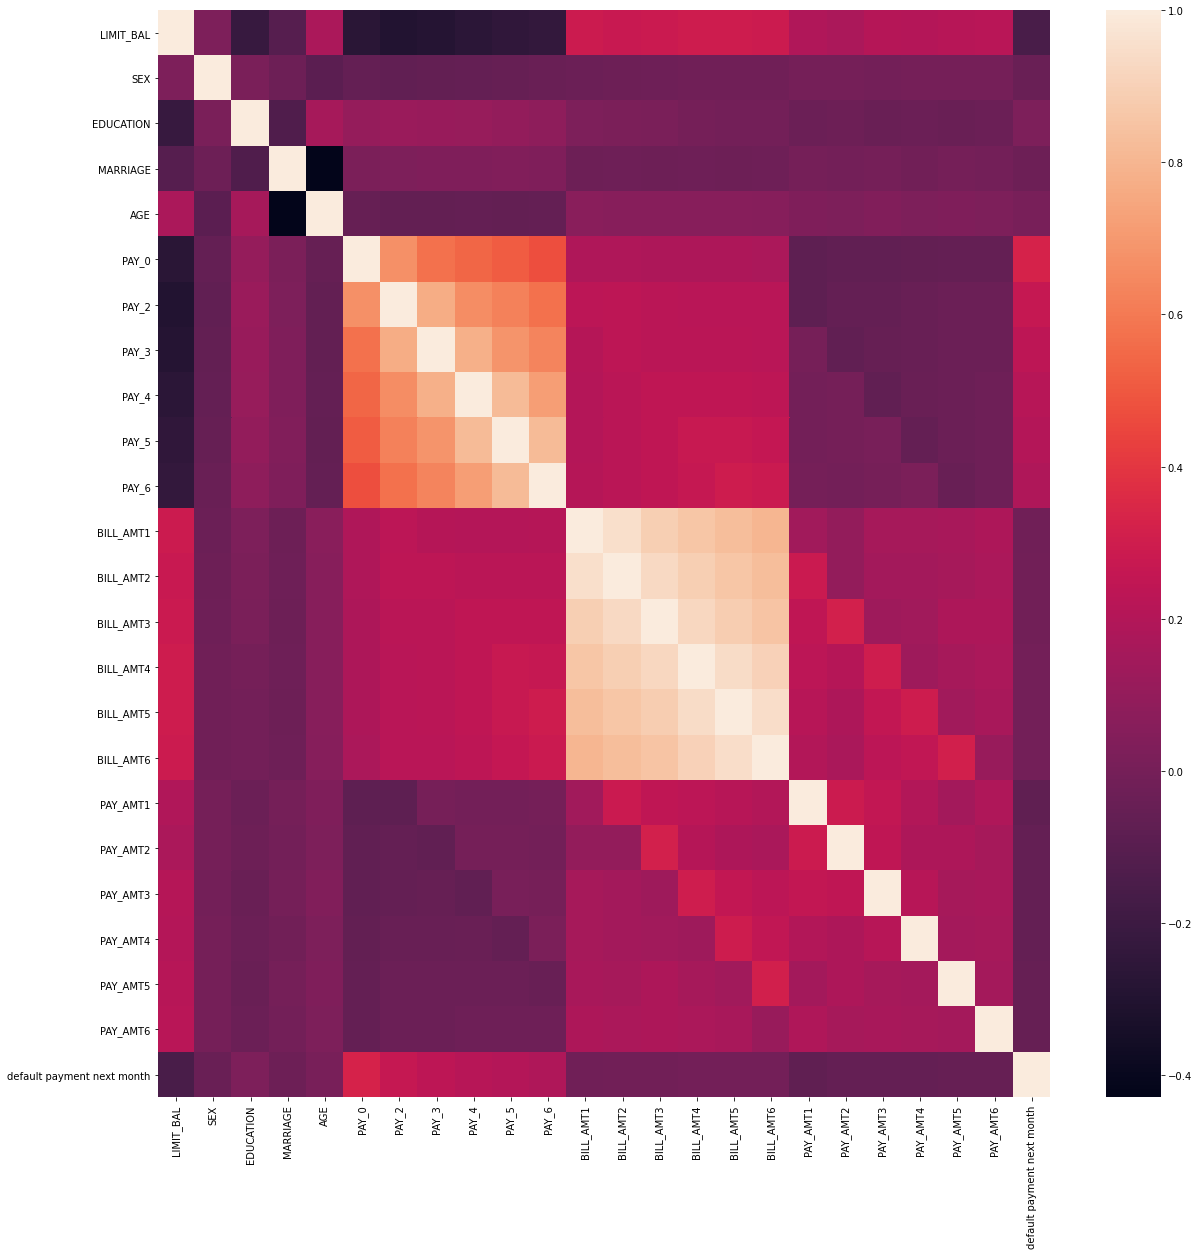

In [112]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [113]:
df.drop(["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"],axis=1,inplace=True)

<AxesSubplot:>

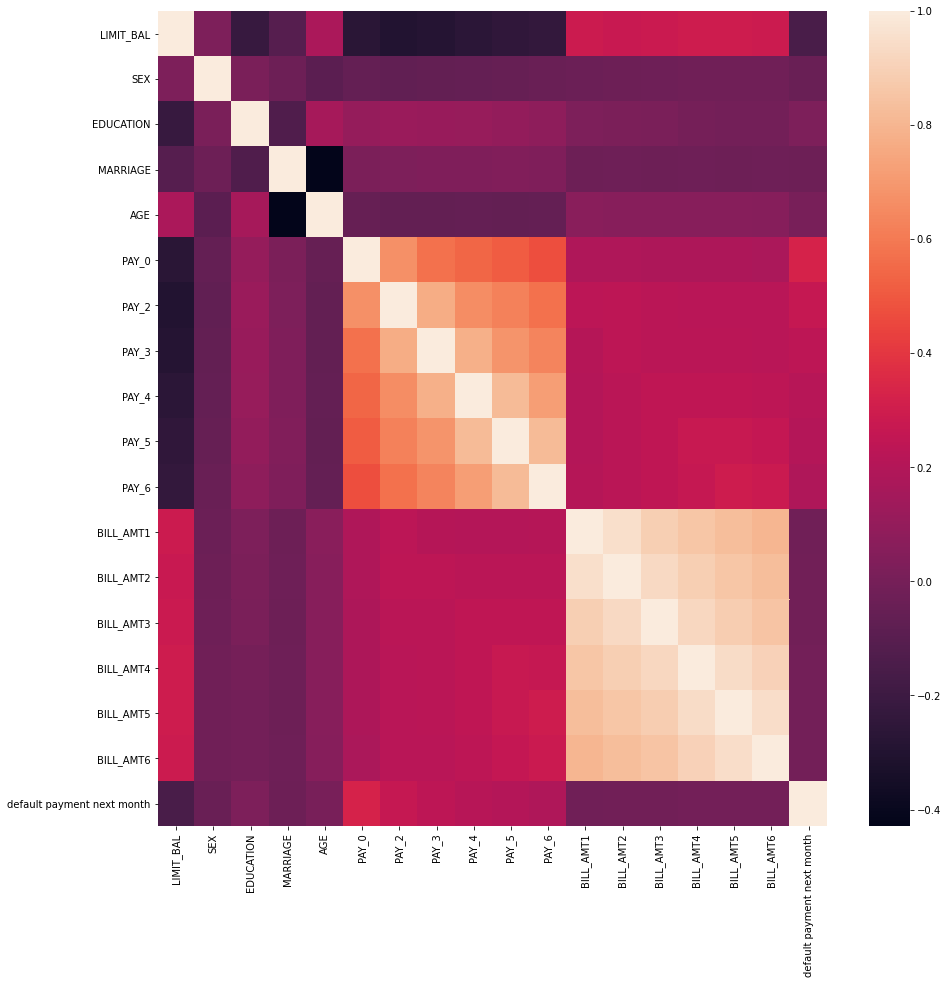

In [114]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [115]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'default payment next month'],
      dtype='object')

In [116]:
df.drop(['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],axis=1,inplace=True)

<AxesSubplot:>

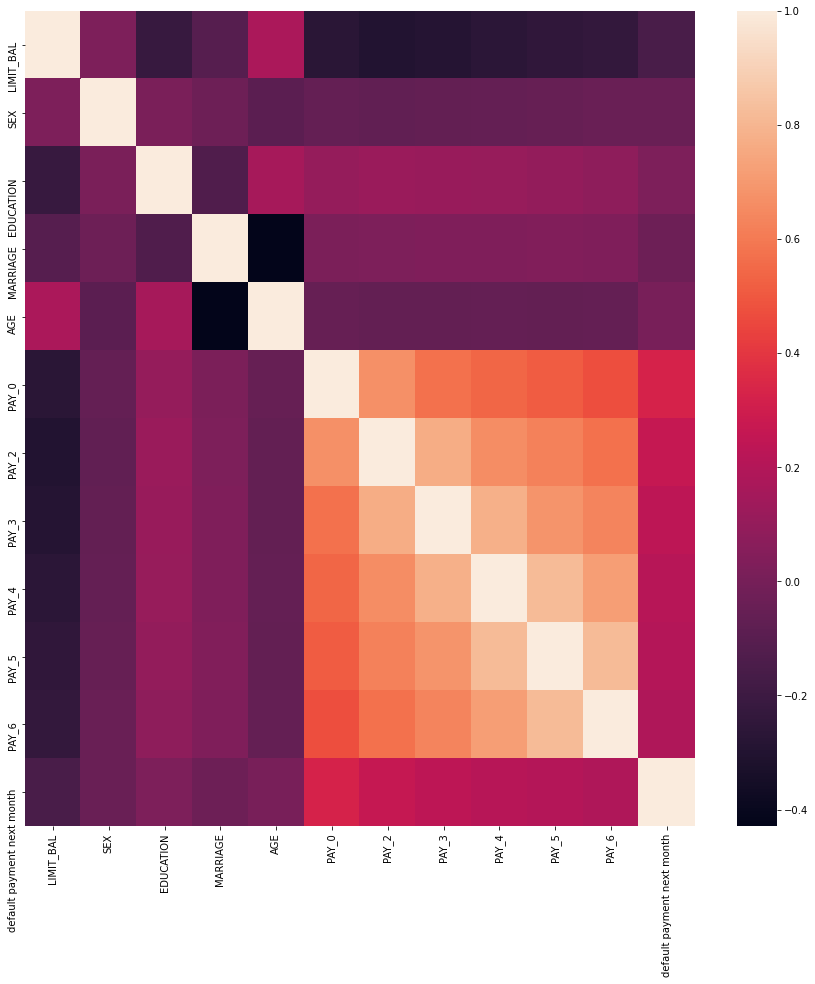

In [117]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [118]:
X = df.drop("default payment next month",axis=1)
y = df["default payment next month"]

Feature ranking:
1. feature 4 (0.286419)
2. feature 0 (0.242821)
3. feature 5 (0.126429)
4. feature 6 (0.062880)
5. feature 2 (0.059051)
6. feature 10 (0.046738)
7. feature 9 (0.046529)
8. feature 7 (0.045902)
9. feature 8 (0.040373)
10. feature 3 (0.027210)
11. feature 1 (0.015649)


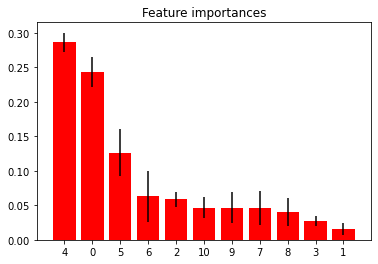

In [119]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [120]:
for i,j in zip(range(len(df.columns)),df.columns):
    print(i,j)

0 LIMIT_BAL
1 SEX
2 EDUCATION
3 MARRIAGE
4 AGE
5 PAY_0
6 PAY_2
7 PAY_3
8 PAY_4
9 PAY_5
10 PAY_6
11 default payment next month


In [121]:
del df["SEX"]

In [122]:
len(df.columns)

11

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

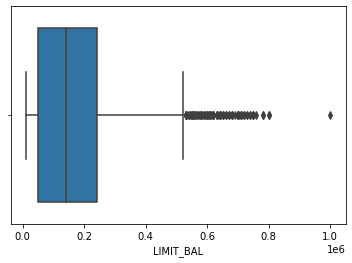

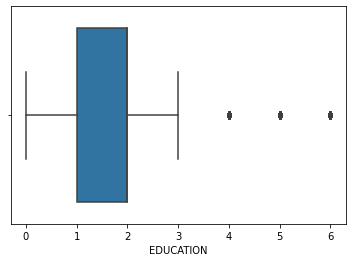

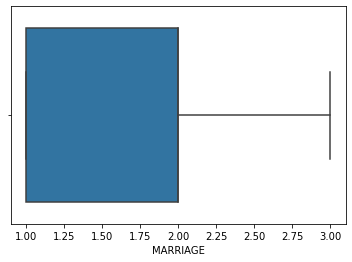

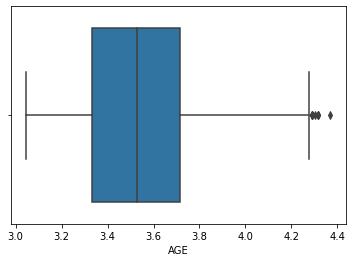

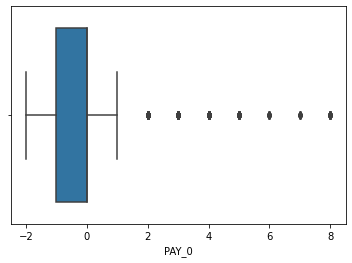

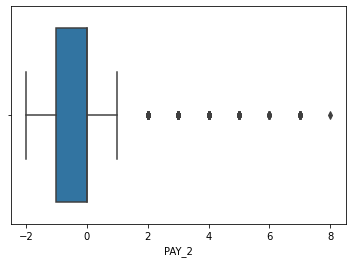

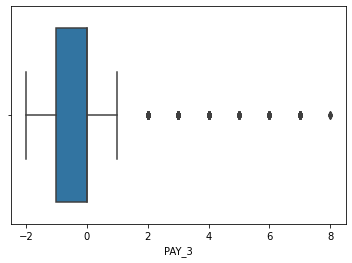

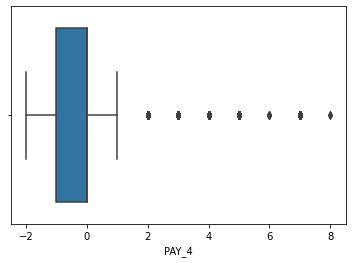

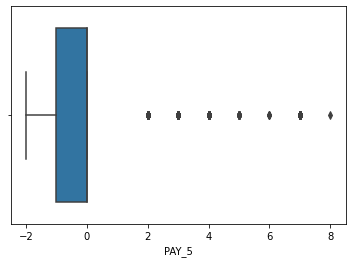

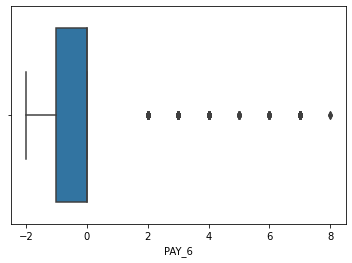

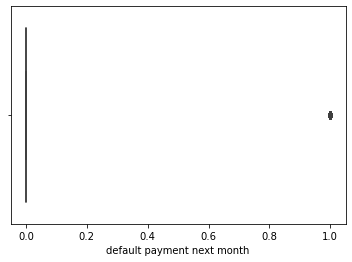

In [123]:
for i in df.columns: 
    plt.subplots()
    sns.boxplot(df[i])
    plt.plot()

In [124]:
df["PAY_0"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [125]:
df = df[df["PAY_0"].isin([-2,-1,0,1,2])]
df.shape

(29537, 11)

In [126]:
df = df[df["PAY_2"].isin([-2,-1,0,1,2])]
df = df[df["PAY_3"].isin([-2,-1,0,1,2])]
df = df[df["PAY_4"].isin([-2,-1,0,1,2])]
df = df[df["PAY_5"].isin([-2,-1,0,1,2])]


In [127]:
df = df[df["PAY_6"].isin([-2,-1,0,1,2])]


In [128]:
df.columns

Index(['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month'],
      dtype='object')

In [129]:
df["default payment next month"].value_counts()

0    22921
1     5886
Name: default payment next month, dtype: int64

In [130]:
df["LIMIT_BAL"]

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29994     80000
29995    220000
29996    150000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 28807, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default payment next month', ylabel='LIMIT_BAL'>

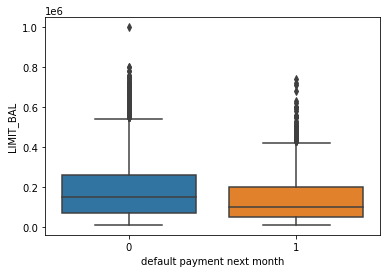

In [131]:
sns.boxplot(df["default payment next month"],df["LIMIT_BAL"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

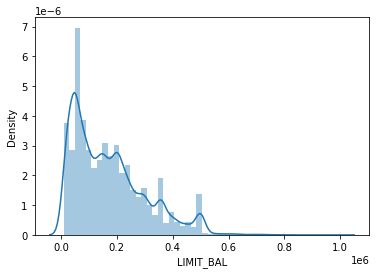

In [132]:
sns.distplot(df["LIMIT_BAL"])

In [133]:
df["LIMIT_BAL"] = np.log(df["LIMIT_BAL"])

In [134]:
df

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
0,9.903488,2,1,3.178054,2,2,-1,-1,-2,-2,1
1,11.695247,2,2,3.258097,-1,2,0,0,0,2,1
2,11.407565,2,2,3.526361,0,0,0,0,0,0,0
3,10.819778,2,1,3.610918,0,0,0,0,0,0,0
4,10.819778,2,1,4.043051,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29994,11.289782,2,2,3.526361,2,2,2,2,2,2,1
29995,12.301383,3,1,3.663562,0,0,0,0,0,0,0
29996,11.918391,3,2,3.761200,-1,-1,-1,-1,0,0,0
29998,11.289782,3,1,3.713572,1,-1,0,0,0,-1,1


In [38]:
X = df.drop("default payment next month",axis = 1)
y = df["default payment next month"]

In [39]:
from sklearn.preprocessing import MinMaxScaler
madmax = MinMaxScaler()
madmax.fit(X)
X_transf  = madmax.transform(X)

In [40]:
X = df.drop("default payment next month", axis=1).values
y = df["default payment next month"].values

lista = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split( X_transf , y, test_size=0.3)

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)


    lista.append(accuracy_score(y_test,y_pred))

np.array(lista).mean()

0.8031250723128543

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6299,  600],
       [1072,  672]], dtype=int64)

In [42]:
recall_score(y_test,y_pred)

0.3853211009174312

In [43]:
X = df.drop("default payment next month", axis=1).values
y = df["default payment next month"].values
from sklearn import svm


lista = []
for i in range(1):
    X_train, X_test, y_train, y_test = train_test_split( X_transf , y, test_size=0.3)

    clf = svm.SVC(kernel='linear',class_weight={0:0.5,1:3} )
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    #print("Accuracy: ", accuracy_score(y_test,yhat))

    lista.append(accuracy_score(y_test,yhat))

np.array(lista).mean()




0.47923174823556636

In [44]:
confusion_matrix(y_test,yhat)

array([[2750, 4116],
       [ 385, 1392]], dtype=int64)

In [45]:
recall_score(y_test,yhat)

0.7833427124366911

In [46]:
X = df.drop("default payment next month", axis=1).values
y = df["default payment next month"].values

from sklearn.ensemble import AdaBoostClassifier


lista = []
for i in range(1):
    X_train, X_test, y_train, y_test = train_test_split( X_transf , y, test_size=0.3)

    clf = AdaBoostClassifier(n_estimators=400)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    #print("Accuracy: ", accuracy_score(y_test,yhat))

    lista.append(accuracy_score(y_test,yhat))

np.array(lista).mean()

0.8206641212541942

In [47]:
confusion_matrix(y_test,yhat)

array([[6562,  274],
       [1276,  531]], dtype=int64)

In [48]:
recall_score(y_test,yhat)

0.29385722191477587

In [49]:
X = df.drop("default payment next month", axis=1).values
y = df["default payment next month"].values

from sklearn.ensemble import RandomForestClassifier


lista = []
for i in range(1):
    X_train, X_test, y_train, y_test = train_test_split( X_transf , y, test_size=0.3)

    clf = RandomForestClassifier(n_estimators=400)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    #print("Accuracy: ", accuracy_score(y_test,yhat))

    lista.append(accuracy_score(y_test,yhat))

np.array(lista).mean()

0.7970612055999075

In [50]:
confusion_matrix(y_test,yhat)

array([[6317,  535],
       [1219,  572]], dtype=int64)

In [51]:
recall_score(y_test,yhat)

0.3193746510329425

KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
X = df.drop("default payment next month", axis=1).values
y = df["default payment next month"].values

In [70]:
# Entrenamiento
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20164, 10) (20164,)
Test set: (8643, 10) (8643,)


In [94]:
clasificador = KNeighborsClassifier(15) 
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
print("Accuracy: ", accuracy_score(y_test, yhat))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))
print("Recall: ", recall_score(y_test, yhat, average="macro"))

Accuracy:  0.8215897257896564
F1-score:  0.6538054755207916
Recall:  0.6306102590245255


buscar la k 

In [92]:
list_accuracy=[]
for i in range(1,50):
    print(i)
    clasificador = KNeighborsClassifier(i)
    clasificador.fit(X_train, y_train)
    yhat = clasificador.predict(X_test)
    resultado = accuracy_score(y_test, yhat)
    list_accuracy.append(resultado)
print(list_accuracy)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
[0.7418720351729724, 0.8044660418836053, 0.7882679625130163, 0.8086312622931853, 0.8040032396158742, 0.8112923753326391, 0.8104824713641097, 0.8141848895059586, 0.8131435844035636, 0.8174245053800764, 0.8153418951752863, 0.8200856184195302, 0.8200856184195302, 0.822283929191253, 0.8215897257896564, 0.8244822399629759, 0.822283929191253, 0.8230938331597825, 0.8203170195533959, 0.8217054263565892, 0.8214740252227236, 0.8226310308920514, 0.8223996297581858, 0.8221682286243203, 0.8225153303251186, 0.8228624320259169, 0.822283929191253, 0.8228624320259169, 0.8227467314589841, 0.8227467314589841, 0.8226310308920514, 0.8235566354275136, 0.8229781325928497, 0.8226310308920514, 0.8230938331597825, 0.8229781325928497, 0.823325234293648, 0.8234409348605808, 0.8227467314589841, 0.8235566354275136, 0.823325234293648, 0.823325234293648, 0.822283929191253, 0.822978

In [93]:
np.argmax(list_accuracy)

15

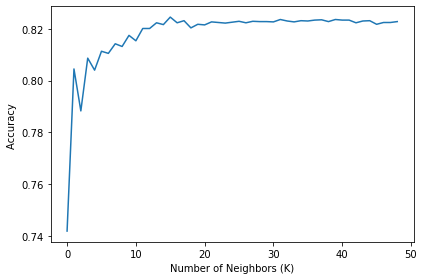

In [96]:
plt.plot(list_accuracy)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout() #Ajusta automáticamente los parámetros de la subtrama
plt.show() #La gráf

Regresión Logistica

In [76]:
X = df.drop("default payment next month", axis=1).values
y = df["default payment next month"].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20164, 10) (20164,)
Test set: (8643, 10) (8643,)


In [81]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

In [82]:
print("Accuracy: ", accuracy_score(y_test, yhat))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))
print("Recall: ", recall_score(y_test, yhat, average="macro"))

Accuracy:  0.812912183269698
F1-score:  0.5867395181407131
Recall:  0.5781519451664495


Arbol de decision

In [83]:
from sklearn import tree

In [84]:
X = df.drop("default payment next month", axis=1).values
y = df["default payment next month"].values

In [85]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3)

print(X_trainset.shape)
print(y_trainset.shape)

(20164, 10)
(20164,)


In [86]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_trainset, y_trainset)
yhat = clf.predict(X_testset)

print("Accuracy: ", accuracy_score(y_test, yhat))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))
print("Recall: ", recall_score(y_test, yhat, average="macro"))

Accuracy:  0.6733772995487678
F1-score:  0.4997396817110948
Recall:  0.4997756443820802


SVM

In [88]:
from sklearn import svm

In [87]:
X = df.drop("default payment next month", axis=1).values
y = df["default payment next month"].values

In [89]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20164, 10) (20164,)
Test set: (8643, 10) (8643,)


In [97]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,yhat))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))
print("Recall: ", recall_score(y_test, yhat, average="macro"))

Accuracy:  0.7974083073007058
F1-score:  0.44364338590280017
Recall:  0.5
